In [23]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
path = "/Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie"
os.chdir(path)
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import bamboolib

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


In [24]:
df = pd.read_csv('./data/metro_CA_2011_2018_lagged.csv', index_col = None)
# drop missing data after lagging and keep only dataset lagged by 1 year
df = df.iloc[:, :-4].dropna()

df["year"]= pd.to_datetime(df["year"], format = "%Y").dt.year
df.sort_values("year", ignore_index = True, inplace = True)
df.head()

dem = [ 'not_us_citizen_pop',
        'median_age',
        'amerindian_including_hispanic',
        'amerindian_pop', 
        'asian_including_hispanic',
        'asian_male_45_54',
        'asian_male_55_64',
        'asian_pop',
        'black_including_hispanic',
         'black_male_45_54',
         'black_male_55_64',
         'black_pop',
         'white_including_hispanic',
 'white_male_45_54',
 'white_male_55_64',
 'white_pop',
   'female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_5_to_9',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
       'female_pop',
 'female_under_5',
       'hispanic_any_race',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'hispanic_pop',
       'male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24',
 'male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_64_associates_degree',
 'male_45_64_bachelors_degree',
 'male_45_64_grade_9_12',
 'male_45_64_graduate_degree',
 'male_45_64_high_school',
 'male_45_64_less_than_9_grade',
 'male_45_64_some_college',
 'male_45_to_49',
 'male_45_to_64',
 'male_50_to_54',
 'male_55_to_59',
 'male_5_to_9',
 'male_60_61',
 'male_62_64',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'male_pop',
 'male_under_5',
  'not_hispanic_pop',
  'other_race_pop',
       'pop_15_and_over',
 'pop_16_over',
 'pop_25_64',
 'pop_25_years_over',
 'pop_5_years_over',
       'population_1_year_and_over',
 'population_3_years_over',
       'speak_only_english_at_home',
 'speak_spanish_at_home',
 'speak_spanish_at_home_low_english',
   'two_or_more_races_pop',
     'total_pop'       
      ]



In [20]:
target = ["rent_in_1y"]
y = df[target]
X = df[dem]
X.shape

(6091, 90)

In [9]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]


In [6]:
# for train_index,test_index in tscv.split(X):
#     print("%s %s" % (train_index, test_index))

In [17]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(.00000001,.0001,10)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [18]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,index,train,test
0,1.000000e-08,0.362347,0.336514
1,1.112000e-05,0.362347,0.336486
2,2.223000e-05,0.362347,0.336459
3,3.334000e-05,0.362347,0.336431
4,4.445000e-05,0.362347,0.336403
5,5.556000e-05,0.362347,0.336374
6,6.667000e-05,0.362347,0.336346
7,7.778000e-05,0.362347,0.336318
8,8.889000e-05,0.362346,0.336289
9,1.000000e-04,0.362346,0.336261


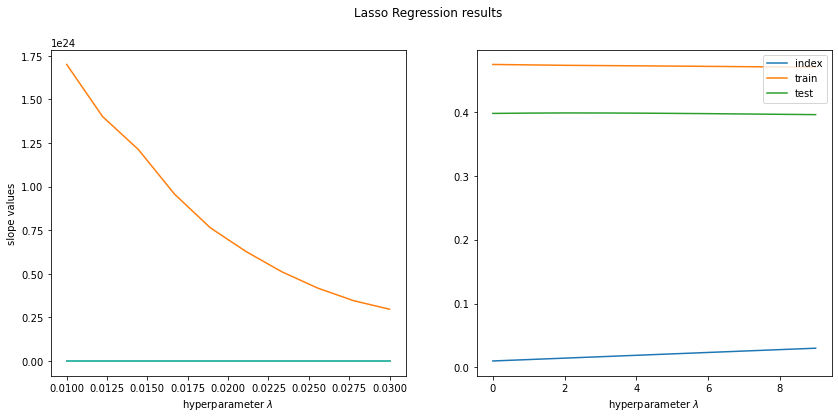

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)
# Takes forever. And still doesn't converge even with max_iter=10000

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Lasso(normalize = True)
lasso_pipe = Pipeline([
    ('standardize', StandardScaler()), 
    ('lasso', lasso)
])
params = {'lasso__alpha': np.linspace(0.01,0.03, 100)}

gs_ls = GridSearchCV(lasso_pipe, param_grid = params, scoring = 'r2', cv = tscv)
gs_ls.fit(X_train, y_train)

print("Estimator which gave the highest score: ", gs_ls.best_estimator_)
print("Mean cross-validated score of the best_estimator: ", gs_ls.best_score_)
print("The best parameters are: ", gs_ls.best_params_)

Estimator which gave the highest score:  Pipeline(steps=[('standardize', StandardScaler()),
                ('lasso', Lasso(alpha=0.011414141414141415, normalize=True))])
Mean cross-validated score of the best_estimator:  0.42540399172094484
The best parameters are:  {'lasso__alpha': 0.011414141414141415}


In [50]:
lasso.set_params(alpha = 0.011414141414141415, tol = .01, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_coefs = dict(zip(X.columns, lasso.coef_))

lasso_coefs_keep = {k:v for (k,v) in 
                    sorted(lasso_coefs.items(), key = lambda item: item[1], reverse = True)
                    if v !=0}
print(len(lasso_coefs_keep))
lasso_coefs_keep

63


{'median_age': 24.19664517922497,
 'male_45_64_graduate_degree': 0.6271722605456067,
 'male_65_to_66': 0.48371507642645895,
 'male_85_and_over': 0.4697304588301178,
 'asian_male_55_64': 0.37493754486765185,
 'female_35_to_39': 0.25637327191404813,
 'black_male_55_64': 0.2187482346818146,
 'female_18_to_19': 0.20897477885870866,
 'male_67_to_69': 0.19652407033879013,
 'male_60_61': 0.18564919594709856,
 'female_30_to_34': 0.1824129130838508,
 'male_45_64_bachelors_degree': 0.1706702862391271,
 'male_70_to_74': 0.16381783055872168,
 'female_45_to_49': 0.14874089424696593,
 'female_65_to_66': 0.12792795306656318,
 'male_45_64_less_than_9_grade': 0.12163407588712452,
 'male_50_to_54': 0.10241744352675593,
 'female_40_to_44': 0.08853754955342448,
 'male_25_to_29': 0.08635646785759447,
 'other_race_pop': 0.07819255272546734,
 'hispanic_male_55_64': 0.06354181852444217,
 'female_22_to_24': 0.05979922541365944,
 'male_40_to_44': 0.05481163493389527,
 'female_70_to_74': 0.04659767798208127,
 'm

In [27]:
#check occupation influence on target
occ = ['not_in_labor_force',
       'pop_in_labor_force',
       'unemployed_pop',
    'armed_forces',
       'civilian_labor_force',
       'employed_agriculture_forestry_fishing_hunting_mining',
 'employed_arts_entertainment_recreation_accommodation_food',
 'employed_construction',
 'employed_education_health_social',
 'employed_finance_insurance_real_estate',
 'employed_information',
 'employed_manufacturing',
 'employed_other_services_not_public_admin',
 'employed_pop',
 'employed_public_administration',
 'employed_retail_trade',
 'employed_science_management_admin_waste',
 'employed_transportation_warehousing_utilities',
       'employed_wholesale_trade',
       'employed_transportation_warehousing_utilities',
       'graduate_professional_degree',
       'management_business_sci_arts_employed',
 'occupation_management_arts',
 'occupation_natural_resources_construction_maintenance',
 'occupation_production_transportation_material',
 'occupation_sales_office',
 'occupation_services',
  'sales_office_employed',
       'worked_at_home',
 'workers_16_and_over']

In [28]:
target = ["rent_in_1y"]
y = df[target]
X = df[occ]
X.shape

(6091, 30)

In [29]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

In [32]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(.00000001,1,10,)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [33]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,index,train,test
0,1.000000e-08,0.506069,0.476538
1,1.111111e-01,0.485727,0.459320
2,2.222222e-01,0.461000,0.428853
3,3.333333e-01,0.447983,0.412668
4,4.444444e-01,0.443397,0.405111
5,5.555556e-01,0.437953,0.396485
6,6.666667e-01,0.431299,0.386570
7,7.777778e-01,0.423424,0.375345
8,8.888889e-01,0.414355,0.362882
9,1.000000e+00,0.408252,0.354595


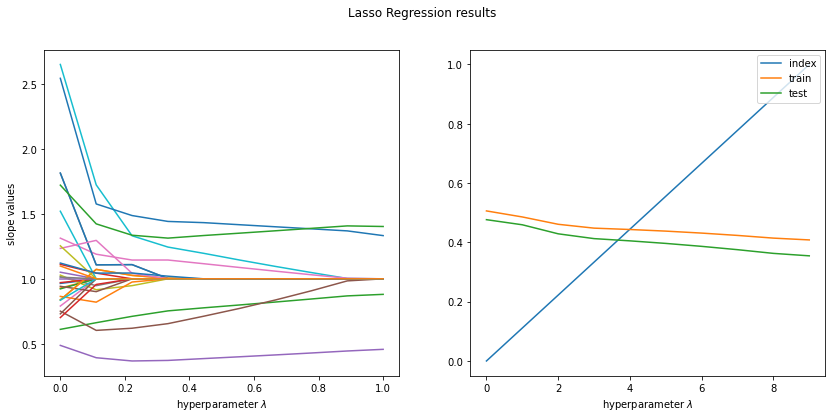

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)
# all features should have larger slops than shown given the test r2 gets lower in this range of alpha 

In [50]:
#check education level influence on target
ed = {'associates_degree',
      'bachelors_degree',
      'bachelors_degree_2',
      'bachelors_degree_or_higher_25_64',
      'group_quarters',
      'high_school_diploma',
      'high_school_including_ged',
      'masters_degree',
      'one_year_more_college',
      'some_college_and_associates_degree',
      'in_grades_1_to_4',
 'in_grades_5_to_8',
 'in_grades_9_to_12',
 'in_school',
 'in_undergrad_college',
       'less_one_year_college',
 'less_than_high_school_graduate'}
X = df[ed]
X = X.drop(['high_school_diploma','one_year_more_college','in_grades_1_to_4',
 'in_grades_5_to_8',
 'in_grades_9_to_12',
'less_one_year_college', 'some_college_and_associates_degree'],axis = 1)

In [51]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

In [52]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = [.000001,.0001,0.001,0.01,0.1,1]
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [53]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,index,train,test
0,0.000001,0.421575,0.387600
1,0.000100,0.421575,0.387562
2,0.001000,0.421530,0.387205
3,0.010000,0.420642,0.384755
4,0.100000,0.415680,0.374035
5,1.000000,0.352259,0.292661


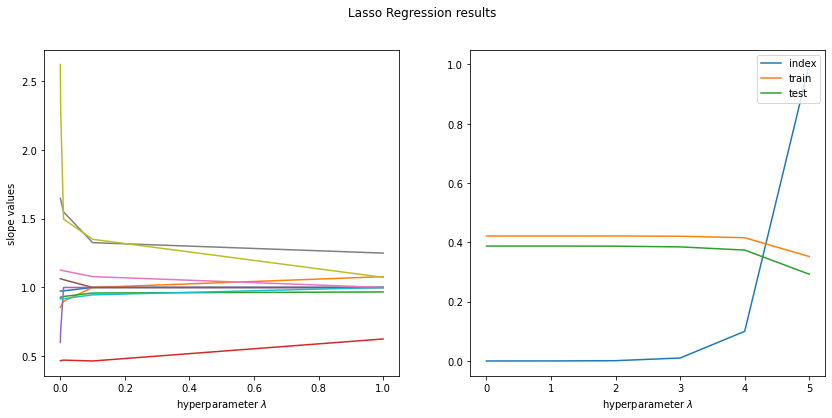

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

In [56]:
# Variables that changes with the model
ar = ['avg_rent',
       'median_rent',
    'vacant_housing_units',
     'vacant_housing_units_for_rent',
     'vacant_housing_units_for_sale'
      ]
X = df[ar]

In [57]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

In [74]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(.1,.5,10)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [75]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,index,train,test
0,0.100000,0.980787,0.981325
1,0.144444,0.980647,0.981600
2,0.188889,0.980456,0.981831
3,0.233333,0.980283,0.981962
4,0.277778,0.980092,0.982040
5,0.322222,0.979867,0.982077
6,0.366667,0.979610,0.982074
7,0.411111,0.979319,0.982030
8,0.455556,0.978995,0.981946
9,0.500000,0.978637,0.981821


In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Lasso(normalize = True)
lasso_pipe = Pipeline([
    ('standardize', StandardScaler()), 
    ('lasso', lasso)
])
params = {'lasso__alpha': np.linspace(0.5,.7, 100)}

gs_ls = GridSearchCV(lasso_pipe, param_grid = params, scoring = 'r2', cv = tscv)
gs_ls.fit(X_train, y_train)

print("Estimator which gave the highest score: ", gs_ls.best_estimator_)
print("Mean cross-validated score of the best_estimator: ", gs_ls.best_score_)
print("The best parameters are: ", gs_ls.best_params_)

Estimator which gave the highest score:  Pipeline(steps=[('standardize', StandardScaler()),
                ('lasso', Lasso(alpha=0.6595959595959595, normalize=True))])
Mean cross-validated score of the best_estimator:  0.9794588874994213
The best parameters are:  {'lasso__alpha': 0.6595959595959595}


In [80]:
lasso.set_params(alpha = 0.6595959595959595, tol = .01, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_coefs = dict(zip(X.columns, lasso.coef_))

lasso_coefs_keep = {k:v for (k,v) in 
                    sorted(lasso_coefs.items(), key = lambda item: item[1], reverse = True)
                    if v !=0}
print(len(lasso_coefs_keep))
lasso_coefs_keep

1


{'avg_rent': 0.9442107301200358}